## Analyse de données de kipler

## Objectif

L'objectif de la suite du notebook sera :

1- Dans un premier temps de faire l'analyse et traitments des données (NAN, valeurs abérantes ..).

2- Dans un second temps de prédire si un koi EST une exoplanéte ou NON, pour ce faire on fixe 'koi_disposition'comme label.

Columns explication :
https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html

In [1]:
# load some default Python modules
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [2]:
df_train =  pd.read_csv("cumulative.csv", index_col=0).reset_index()
df_train.shape

(9564, 50)

In [3]:
df_train.describe()

,rowid,kepid,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,9564.000000,9.564000e+03,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,...,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
mean,4782.500000,7.690628e+06,0.480829,0.188206,0.231598,0.194898,0.120033,75.671358,0.002148,-0.002148,...,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,2761.033321,2.653459e+06,0.476928,0.390897,0.421875,0.396143,0.325018,1334.744046,0.008236,0.008236,...,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,1.000000,7.574500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.172500,...,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,2391.750000,5.556034e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,...,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,4782.500000,7.906892e+06,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,...,-160.000000,4.438000,0.070000,-0.128000,1.000000,0.251000,-0.111000,292.261125,43.677504,14.520000
75%,7173.250000,9.873066e+06,0.998000,0.000000,0.000000,0.000000,0.000000,40.715178,0.000276,-0.000005,...,-114.000000,4.543000,0.149000,-0.088000,1.345000,0.364000,-0.069000,295.859160,46.714611,15.322000
max,9564.000000,1.293514e+07,1.000000,1.000000,1.000000,1.000000,1.000000,129995.778400,0.172500,0.000000,...,0.000000,5.364000,1.472000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000


In [4]:
df_train.loc[(df_train['koi_disposition'] == "CONFIRMED" )].head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
5,6,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
6,7,10872983,K00756.02,Kepler-228 c,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [5]:
def normaliser(disposistion):
    if disposistion == "CONFIRMED":
        return 1
    elif (disposistion == "FALSE POSITIVE"):
        return 0
    elif (disposistion == "CANDIDATE"):
        return 2 
    elif (disposistion == "NOT DISPOSITIONED"):
        return 3
    else: 
        return 0


df_train_nor = df_train.copy()
df_train_nor['koi_disposition_nor'] = df_train_nor.apply(lambda row: normaliser(row['koi_disposition']), axis=1)
df_train_nor['koi_pdisposition_nor'] = df_train_nor.apply(lambda row: normaliser(row['koi_pdisposition']), axis=1)

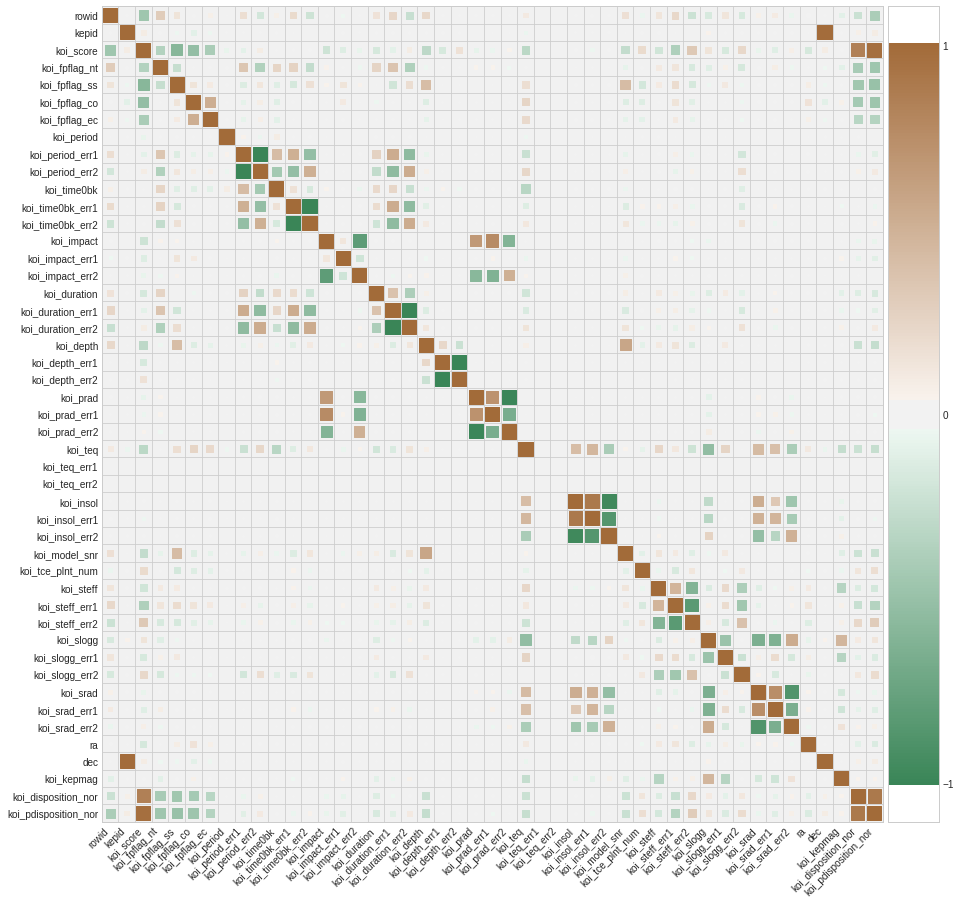

In [6]:
def heatmap(x, y, **kwargs):
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)

    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors)

    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            if np.isnan(val_position): val_position = 0
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]

    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)

    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)

    size_scale = kwargs.get('size_scale', 500)

    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs:
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}

    if 'y_order' in kwargs:
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}

    plot_grid = plt.GridSpec(15, 15, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot

    marker = kwargs.get('marker', 's')

    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order'
    ]}

    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size],
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=45, horizontalalignment='right')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num])

    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')

    # Add color legend on the right side of the plot
    if color_min < color_max:
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

        bar_height = bar_y[1] - bar_y[0]
        ax.barh(
            y=bar_y,
            width=[5]*len(palette), # Make bars 5 units wide
            left=col_x, # Make bars start at 0
            height=bar_height,
            color=palette,
            linewidth=0
        )
        ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
        ax.grid(False) # Hide grid
        ax.set_facecolor('white') # Make background white
        ax.set_xticks([]) # Remove horizontal ticks
        ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
        ax.yaxis.tick_right() # Show vertical ticks on the right


def corrplot(data, size_scale=200, marker='s'):
    corr = pd.melt(data.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    heatmap(
        corr['x'], corr['y'],
        color=corr['value'], color_range=[-1, 1],
        palette=sns.diverging_palette(140, 40, n=256),
        size=corr['value'].abs(), size_range=[0,1],
        marker=marker,
        x_order=data.columns,
        y_order=data.columns[::-1],
        size_scale=size_scale
)

plt.figure(figsize=(15, 15))

corrplot(df_train_nor.corr())

In [7]:
cor = 0.2
correlation = pd.DataFrame((abs(df_train_nor.corr()['koi_disposition_nor']) > cor) & (abs(df_train_nor.corr()['koi_pdisposition_nor']) > cor))
correlation.loc[correlation[0] == True]

,0
rowid,True
koi_score,True
koi_fpflag_nt,True
koi_fpflag_ss,True
koi_fpflag_co,True
koi_fpflag_ec,True
koi_depth,True
koi_teq,True
koi_model_snr,True
koi_steff_err1,True


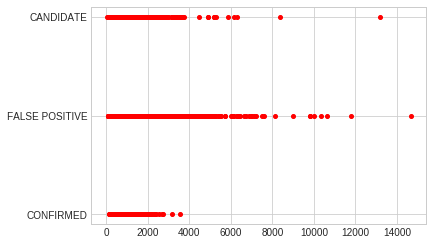

In [8]:
plt.plot(df_train_nor['koi_teq'], df_train_nor['koi_disposition'], 'ro', markersize=4)
plt.show()

Nous remanquons que les colonnes koi_disposition et koi_pdisposition sont en sont en correlation avec un d'autres collonnes que nous décidons de sélectionner pour la prédiction. 

Aprés analyse, nous décidont de prendre les attributs de la cellule suivante pour traitment. Cette décision sera menée à  être changée si nécissaire.

In [9]:
data = df_train[['koi_score','koi_fpflag_nt','koi_fpflag_ss','koi_fpflag_co','koi_fpflag_ec','koi_depth','koi_teq','koi_model_snr','koi_steff_err1','koi_steff_err2','ra','koi_disposition','koi_pdisposition']]
data.loc[data['koi_disposition'] == data['koi_pdisposition']].shape

(7271, 13)

In [10]:
data.shape

(9564, 13)

In [11]:
data.loc[data['koi_pdisposition'] == 'FALSE POSITIVE'].loc[data['koi_disposition'] == 'CONFIRMED'].shape

(45, 13)

### Remarque :
On remarque qu'il ya un certain nombre de koi qui ont été désaprouvés par kipler, donc nous nous basant sur ça on change les valeurs de la colonne 'koi_disposition' de c'est ligne en question de 'CONFIRMED' à 'FALSE POSITIVE'.

On part aussi du principe que si un koi n'a pas encore été désaprouvé par kipler, c'est une exoplanéte.

   

In [12]:
data.loc[data['koi_pdisposition'] == 'FALSE POSITIVE'].loc[data['koi_disposition'] == 'CONFIRMED'].shape

(45, 13)

In [13]:
mask = (data['koi_pdisposition'] == 'FALSE POSITIVE') & (data['koi_disposition'] == 'CONFIRMED')
data['koi_disposition'][mask] = 'FALSE POSITIVE'
data.loc[data['koi_pdisposition'] == 'FALSE POSITIVE'].loc[data['koi_disposition'] == 'CONFIRMED'].shape

(0, 13)

In [14]:
data.head()

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_depth,koi_teq,koi_model_snr,koi_steff_err1,koi_steff_err2,ra,koi_disposition,koi_pdisposition
0,1.000,0,0,0,0,615.8,793.0,35.8,81.0,-81.0,291.93423,CONFIRMED,CANDIDATE
1,0.969,0,0,0,0,874.8,443.0,25.8,81.0,-81.0,291.93423,CONFIRMED,CANDIDATE
2,0.000,0,1,0,0,10829.0,638.0,76.3,158.0,-176.0,297.00482,FALSE POSITIVE,FALSE POSITIVE
3,0.000,0,1,0,0,8079.2,1395.0,505.6,157.0,-174.0,285.53461,FALSE POSITIVE,FALSE POSITIVE
4,1.000,0,0,0,0,603.3,1406.0,40.9,169.0,-211.0,288.75488,CONFIRMED,CANDIDATE


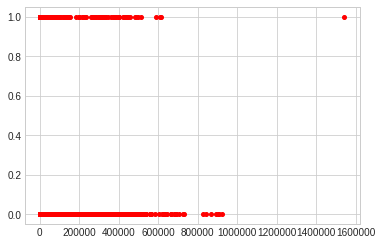

In [15]:
plt.plot(data['koi_depth'], data['koi_fpflag_nt'], 'ro', markersize=4)
plt.show()

In [16]:
data.isnull().T.any().T.sum()

1672

In [17]:
data.groupby(['koi_disposition']).mean()

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_depth,koi_teq,koi_model_snr,koi_steff_err1,koi_steff_err2,ra
koi_disposition,,,,,,,,,,,
CANDIDATE,0.900210,0.00000,0.014235,0.000000,0.000000,1864.238856,882.420137,45.595789,139.562701,-153.667892,291.789595
CONFIRMED,0.979740,0.00000,0.004448,0.000000,0.000000,1117.396619,838.390125,87.884164,116.998665,-124.325280,290.941233
FALSE POSITIVE,0.015733,0.35517,0.428769,0.367798,0.226519,44529.952202,1294.850252,439.199560,160.300578,-184.434997,292.676499


In [18]:
data.groupby(['koi_disposition']).median()

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_depth,koi_teq,koi_model_snr,koi_steff_err1,koi_steff_err2,ra
koi_disposition,,,,,,,,,,,
CANDIDATE,0.987,0,0,0,0,257.90,772.0,12.40,154.0,-154.0,292.117185
CONFIRMED,1.000,0,0,0,0,460.10,782.0,31.55,107.0,-112.0,291.111880
FALSE POSITIVE,0.000,0,0,0,0,548.25,1086.5,29.50,164.0,-178.0,292.924820


Aprés obeservation et réflixion, on décide de remplace les nan par la median de leur colonne, et ce aprés avoir  fait un groupby sur la colonne 'koi_disposition'

In [19]:
nan_rows = data[data.isnull().T.any().T]
nan_rows.loc[nan_rows["koi_disposition"] == "CONFIRMED"].head()

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_depth,koi_teq,koi_model_snr,koi_steff_err1,koi_steff_err2,ra,koi_disposition,koi_pdisposition
99,NaN,0,0,0,0,488.0,524.0,11.6,99.0,-112.0,285.28363,CONFIRMED,CANDIDATE
142,1.0,0,0,0,0,1037.3,616.0,48.9,99.0,NaN,294.20215,CONFIRMED,CANDIDATE
290,1.0,0,0,0,0,280.1,1315.0,30.6,111.0,NaN,292.58044,CONFIRMED,CANDIDATE
528,NaN,0,0,0,0,1479.0,758.0,302.2,82.0,-116.0,291.14807,CONFIRMED,CANDIDATE
843,NaN,0,0,0,0,2319.1,178.0,96.1,121.0,-95.0,283.25681,CONFIRMED,CANDIDATE


In [20]:
clean_data = data.fillna(data.groupby('koi_disposition').transform('median'))
nan_rows = clean_data[clean_data.isnull().T.any().T]
nan_rows

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_depth,koi_teq,koi_model_snr,koi_steff_err1,koi_steff_err2,ra,koi_disposition,koi_pdisposition


In [21]:
clean_data.iloc[555]

koi_score                        0
koi_fpflag_nt                    0
koi_fpflag_ss                    0
koi_fpflag_co                    0
koi_fpflag_ec                    0
koi_depth                   548.25
koi_teq                     1086.5
koi_model_snr                 29.5
koi_steff_err1                 164
koi_steff_err2                -178
ra                         284.386
koi_disposition     FALSE POSITIVE
koi_pdisposition    FALSE POSITIVE
Name: 555, dtype: object

In [22]:
data.iloc[555]

koi_score                      NaN
koi_fpflag_nt                    0
koi_fpflag_ss                    0
koi_fpflag_co                    0
koi_fpflag_ec                    0
koi_depth                      NaN
koi_teq                        NaN
koi_model_snr                  NaN
koi_steff_err1                 NaN
koi_steff_err2                 NaN
ra                         284.386
koi_disposition     FALSE POSITIVE
koi_pdisposition    FALSE POSITIVE
Name: 555, dtype: object

In [23]:
clean_data['koi_disposition'].value_counts()

FALSE POSITIVE    5068
CONFIRMED         2248
CANDIDATE         2248
Name: koi_disposition, dtype: int64

In [24]:
msk = clean_data[ clean_data['koi_disposition'] == "CANDIDATE" ].index
c_data = clean_data.copy()
# Delete these row indexes from dataFrame
c_data.drop(msk , inplace=True)
c_data['koi_disposition'].value_counts()

FALSE POSITIVE    5068
CONFIRMED         2248
Name: koi_disposition, dtype: int64

## Régression linéaire  

Dans une premiére étape nous allons faire la prédiction de koi_score

In [25]:
from sklearn import linear_model # Le modèle linéaire
from sklearn.metrics import mean_squared_error, r2_score # Métriques d'évaluation
from sklearn.model_selection import train_test_split

In [26]:
X_l = clean_data[['koi_fpflag_nt','koi_fpflag_ss','koi_fpflag_co'
                ,'koi_fpflag_ec','koi_depth','koi_teq','koi_model_snr','koi_steff_err1','koi_steff_err2','ra']]

Y_l = clean_data['koi_score']
X_l.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_depth,koi_teq,koi_model_snr,koi_steff_err1,koi_steff_err2,ra
0,0,0,0,0,615.8,793.0,35.8,81.0,-81.0,291.93423
1,0,0,0,0,874.8,443.0,25.8,81.0,-81.0,291.93423
2,0,1,0,0,10829.0,638.0,76.3,158.0,-176.0,297.00482
3,0,1,0,0,8079.2,1395.0,505.6,157.0,-174.0,285.53461
4,0,0,0,0,603.3,1406.0,40.9,169.0,-211.0,288.75488


In [27]:
X_train_l, X_test_l, Y_train_l, Y_test_l = train_test_split(X_l, Y_l, shuffle=True, train_size=0.8, random_state=42)

In [28]:
regr = linear_model.LinearRegression(normalize=True)
regr.fit(X_train_l.values, Y_train_l)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [29]:
print(regr.score(X_test_l,Y_test_l))
print("Score train : {:1.4}".format(r2_score(Y_train_l, regr.predict(X_train_l))))
print("Score test : {:1.4}".format(r2_score(Y_test_l, regr.predict(X_test_l))))

0.736058279941984
Score train : 0.7596
Score test : 0.7361


(1000, 1000)


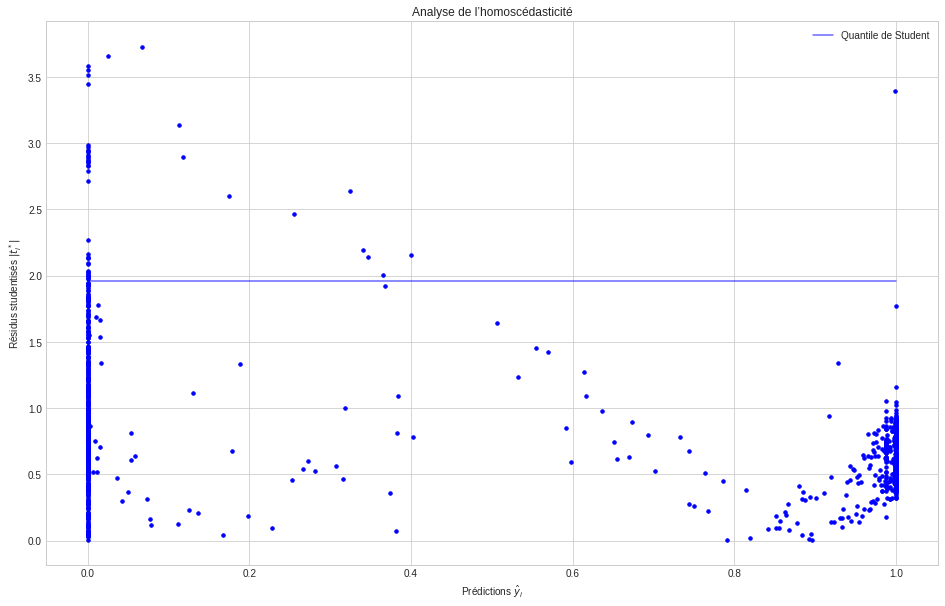

In [30]:
import scipy

X_res = clean_data.sample(n=1000)
n, p = X_res.shape
X_val = X_res[['koi_fpflag_nt','koi_fpflag_ss','koi_fpflag_co'
                ,'koi_fpflag_ec','koi_depth','koi_teq','koi_model_snr','koi_steff_err1','koi_steff_err2','ra']].values
y_val = X_res['koi_score']
residuals = np.abs(y_val - regr.predict(X_val)).values
H = np.matmul(X_val, np.linalg.solve(np.dot(X_val.T, X_val), X_val.T))
std_hat = np.dot(residuals, residuals) / (n - p)
standart_residuals = np.asarray([residuals[i] / np.sqrt(std_hat * (1 - H[i, i])) for i in range(len(residuals))])
student_residuals = np.asarray([ standart_residuals[i] * np.sqrt((n - p - 1) / (n - p - standart_residuals[i]**2)) for i in range(n) ])
print(H.shape)

plt.figure(figsize=(16, 10))
plt.scatter(y_val, student_residuals, s=12, c="blue", edgecolors="blue")
plt.plot([min(y_val), max(y_val)], [ scipy.stats.t.ppf(q=0.975, df=n-p-1), scipy.stats.t.ppf(q=0.975, df=n-p-1)], color="blue", alpha=0.6, label="Quantile de Student")
plt.title("Analyse de l’homoscédasticité")
plt.xlabel("Prédictions $\hat{y}_i$")
plt.ylabel("Résidus studentisés $|t_i^*|$")
plt.legend()

On remarque les la répartition des points suit une tendence pas evidente mais y'a une quand même.

## Classification multiclasses One vs Rest 

In [31]:
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [32]:
X_oVr = clean_data[['koi_fpflag_nt','koi_fpflag_ss','koi_fpflag_co'
                ,'koi_fpflag_ec','koi_depth','koi_teq','koi_model_snr','koi_steff_err1','koi_steff_err2','ra']]

Y_oVr = clean_data['koi_disposition']

In [33]:
X_train_oVr, X_test_oVr, Y_train_oVr, Y_test_oVr = train_test_split(X_oVr, Y_oVr, test_size=0.2)

In [34]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
Y_train_lb_oVr = labelencoder.fit_transform(Y_train_oVr) # On encode pour l'apprentissage
Y_test_lb_oVr = labelencoder.transform(Y_test_oVr)
print(labelencoder.classes_)
print(Y_train_lb_oVr)
print(Y_test_lb_oVr)

['CANDIDATE' 'CONFIRMED' 'FALSE POSITIVE']
[0 0 0 ... 2 2 2]
[0 2 2 ... 0 1 2]


In [35]:
clf = OneVsRestClassifier(SVC())
clf.fit(X_train_oVr, Y_train_lb_oVr)

OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

In [36]:
from sklearn.metrics import classification_report, accuracy_score
predicted_classes = clf.predict(X_test_oVr)

In [37]:
accuracy = accuracy_score(Y_test_lb_oVr,predicted_classes)

print('Accuracy (%): ', accuracy * 100)

print(classification_report(Y_test_lb_oVr,predicted_classes))

Accuracy (%):  48.51019341348667
              precision    recall  f1-score   support

           0       0.28      0.13      0.17       439
           1       0.37      0.03      0.06       469
           2       0.51      0.85      0.64      1005

    accuracy                           0.49      1913
   macro avg       0.39      0.34      0.29      1913
weighted avg       0.42      0.49      0.39      1913



## Random forest

In [38]:
X = clean_data[['koi_fpflag_nt','koi_fpflag_ss','koi_fpflag_co'
                ,'koi_fpflag_ec','koi_depth','koi_teq','koi_model_snr','koi_steff_err1','koi_steff_err2','ra']]

Y = clean_data['koi_disposition']
X.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_depth,koi_teq,koi_model_snr,koi_steff_err1,koi_steff_err2,ra
0,0,0,0,0,615.8,793.0,35.8,81.0,-81.0,291.93423
1,0,0,0,0,874.8,443.0,25.8,81.0,-81.0,291.93423
2,0,1,0,0,10829.0,638.0,76.3,158.0,-176.0,297.00482
3,0,1,0,0,8079.2,1395.0,505.6,157.0,-174.0,285.53461
4,0,0,0,0,603.3,1406.0,40.9,169.0,-211.0,288.75488


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [41]:
labelencoder = LabelEncoder()
Y_train_lb = labelencoder.fit_transform(Y_train) # On encode pour l'apprentissage
Y_test_lb = labelencoder.transform(Y_test)
print(labelencoder.classes_)

['CANDIDATE' 'CONFIRMED' 'FALSE POSITIVE']


In [42]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [43]:
from sklearn.metrics import classification_report, accuracy_score

predicted_classes = classifier.predict(X_test)
accuracy = accuracy_score(Y_test,predicted_classes)
#accuracy = accuracy_score(Y_test.flatten(),predicted_classes)

print('Accuracy (%): ', accuracy * 100)

print(classification_report(Y_test,predicted_classes))

Accuracy (%):  89.33612127548353
                precision    recall  f1-score   support

     CANDIDATE       0.82      0.71      0.76       455
     CONFIRMED       0.76      0.86      0.81       461
FALSE POSITIVE       0.99      0.99      0.99       997

      accuracy                           0.89      1913
     macro avg       0.86      0.85      0.85      1913
  weighted avg       0.90      0.89      0.89      1913



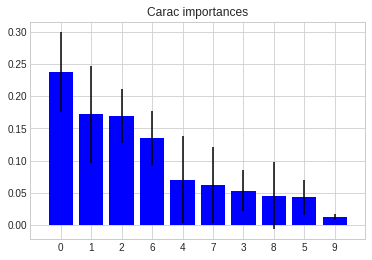

In [44]:
rank = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_], axis=0) # On mesure la variance des caracs
idx = np.argsort(rank)[::-1] # On les ordonne

plt.figure()
plt.title("Carac importances")
plt.bar(range(X_train.shape[1]), rank[idx],
       color="b", yerr=std[idx], align="center")
plt.xticks(range(X_train.shape[1]), idx)
plt.xlim([-1, X_train.shape[1]])
plt.show()

### Cross Validation


In [45]:
from sklearn.model_selection import StratifiedKFold, KFold

X, y = np.ones((50, 1)), np.hstack(([0] * 45, [1] * 5))
skf = StratifiedKFold(n_splits=3)
for train, test in skf.split(X, y):
    print('train -  {}   |   test -  {}'.format(
    np.bincount(y[train]), np.bincount(y[test])))

kf = KFold(n_splits=3)
for train, test in kf.split(X, y):
    print('train -  {}   |   test -  {}'.format(
    np.bincount(y[train]), np.bincount(y[test])))


train -  [30  3]   |   test -  [15  2]
train -  [30  3]   |   test -  [15  2]
train -  [30  4]   |   test -  [15  1]
train -  [28  5]   |   test -  [17]
train -  [28  5]   |   test -  [17]
train -  [34]   |   test -  [11  5]


###  Ouverture sur d'autres tests

#### Suppression de certaines lignes
Test RandomForestClassier aprés avoir enlevé les fignes "CANDIDATE", le resultat est assez logique car la difficulté de la classification réside entre le passage de CANDIDATE à CONFIRMED.

In [47]:
X_c = c_data[['koi_fpflag_nt','koi_fpflag_ss','koi_fpflag_co'
                ,'koi_fpflag_ec','koi_depth','koi_teq','koi_model_snr','koi_steff_err1','koi_steff_err2','ra']]

Y_c = c_data['koi_disposition']

X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(X_c, Y_c, test_size=0.2)
labelencoder = LabelEncoder()
Y_train_lb_c = labelencoder.fit_transform(Y_train_c) # On encode pour l'apprentissage
Y_test_lb_c = labelencoder.transform(Y_test_c)
print(labelencoder.classes_)
classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
classifier.fit(X_train_c, Y_train_lb_c)

predicted_classes_c = classifier.predict(X_test_c)
accuracy = accuracy_score(Y_test_lb_c,predicted_classes_c)
#accuracy = accuracy_score(Y_test.flatten(),predicted_classes)

print('Accuracy (%): ', accuracy * 100)

print(classification_report(Y_test_lb_c,predicted_classes_c))

['CONFIRMED' 'FALSE POSITIVE']
Accuracy (%):  99.31693989071039
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       450
           1       1.00      1.00      1.00      1014

    accuracy                           0.99      1464
   macro avg       0.99      0.99      0.99      1464
weighted avg       0.99      0.99      0.99      1464



###  Classification multi-classe 

In [48]:
from sklearn.linear_model import LogisticRegression

X_train_lr, X_test_lr, Y_train_lr, Y_test_lr = train_test_split(X_oVr, Y_oVr)
Y_train_lb_lr = labelencoder.fit_transform(Y_train_lr) # On encode pour l'apprentissage
Y_test_lb_lr = labelencoder.transform(Y_test_lr)
model = LogisticRegression()
model.fit(X_train_lr, Y_train_lb_lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
predicted_classes = model.predict(X_test_lr)

In [50]:
accuracy = accuracy_score(Y_test_lb_lr,predicted_classes)

print('Accuracy (%): ', accuracy * 100)

print(classification_report(Y_test_lb_lr,predicted_classes))

Accuracy (%):  61.14596403178586
              precision    recall  f1-score   support

           0       0.36      0.05      0.08       575
           1       0.53      0.58      0.55       561
           2       0.65      0.89      0.75      1255

    accuracy                           0.61      2391
   macro avg       0.51      0.50      0.46      2391
weighted avg       0.55      0.61      0.54      2391

